# Week5 - Lab

* Assign X, y
* Train-test split
* Visualize & speculate on training dataset
* Train a logistic regression model
* Evaluate the model, roc score
* Explain findings

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# https://www.kaggle.com/datasets/muhammadtalharasool/simple-gender-classification?select=gender.csv
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/gender.csv').iloc[:,:-1]
df.columns = df.columns.str.strip()
df.Gender = df.Gender.str.strip()
df.Occupation = df.Occupation.str.strip()
df['Education Level'] = df['Education Level'].str.strip()
df['Marital Status'] = df['Marital Status'].str.strip()
df['Favorite Color'] = df['Favorite Color'].str.strip()

In [44]:
df.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow


In [45]:
df.columns

Index(['Gender', 'Age', 'Height (cm)', 'Weight (kg)', 'Occupation',
       'Education Level', 'Marital Status', 'Income (USD)', 'Favorite Color'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           131 non-null    object
 1   Age              131 non-null    int64 
 2   Height (cm)      131 non-null    int64 
 3   Weight (kg)      131 non-null    int64 
 4   Occupation       131 non-null    object
 5   Education Level  131 non-null    object
 6   Marital Status   131 non-null    object
 7   Income (USD)     131 non-null    int64 
 8   Favorite Color   131 non-null    object
dtypes: int64(4), object(5)
memory usage: 9.3+ KB


In [47]:
df['Gender'] = df['Gender'].astype('category')
df['Favorite Color'] = df['Favorite Color'].astype('category')
df['Education Level'] = df['Education Level'].astype('category')
df['Marital Status'] = df['Marital Status'].astype('category')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Gender           131 non-null    category
 1   Age              131 non-null    int64   
 2   Height (cm)      131 non-null    int64   
 3   Weight (kg)      131 non-null    int64   
 4   Occupation       131 non-null    object  
 5   Education Level  131 non-null    category
 6   Marital Status   131 non-null    category
 7   Income (USD)     131 non-null    int64   
 8   Favorite Color   131 non-null    category
dtypes: category(4), int64(4), object(1)
memory usage: 6.6+ KB


In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
# create a label encoder object
le = LabelEncoder()
# df['Occupation'] = le.fit_transform(df['Occupation'])
# df['Education Level'] = le.fit_transform(df['Education Level'])
# df['Favorite Color'] = le.fit_transform(df['Favorite Color'])
# df['Marital Status'] = le.fit_transform(df['Marital Status'])

In [51]:
df

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow
...,...,...,...,...,...,...,...,...,...
126,female,32,170,64,Nurse,Associate's Degree,Single,60000,Orange
127,male,38,176,79,Project Manager,Bachelor's Degree,Married,90000,Black
128,female,27,162,55,Graphic Designer,Associate's Degree,Single,55000,Green
129,male,33,175,77,Sales Representative,Bachelor's Degree,Married,80000,Yellow


# Assign X, y

In [52]:
df['Gender'].replace({'male' : 0, 'female' : 1}, inplace = True)

In [53]:
X = df.drop(columns=['Gender','Occupation', 'Education Level', 'Marital Status', 'Favorite Color'], axis = 1)
y = df['Gender']

# Train-test split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Visualize & speculate on training dataset

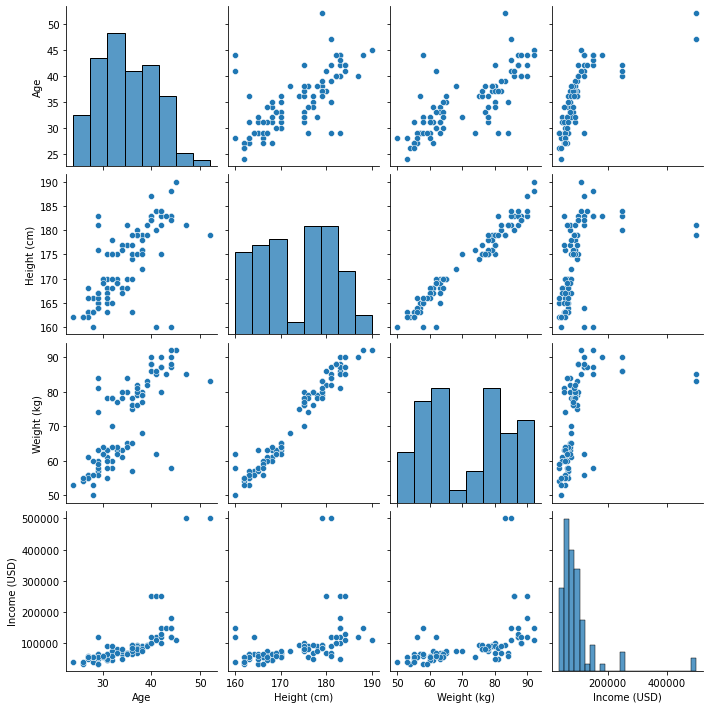

In [55]:
sns.pairplot(X_train)


# Train a logistic regression model

In [56]:
y_train

121    0
98     0
109    0
127    0
111    0
      ..
31     1
94     0
128    1
123    0
60     1
Name: Gender, Length: 91, dtype: category
Categories (2, int64): [1, 0]

In [57]:
lr_model = LogisticRegression(max_iter = 10000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

# Evaluate the model, roc score

In [61]:
y_pred_proba = lr_model.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, y_pred_proba)
print('ROC score:', roc_score)


ROC score: 1.0


# Explain findings

#### => The roc score tells us how well the model can distinguish between the two classes (male and female) based on the given features. A roc score of 0.5 indicates that the model is performing no better than random guessing, while a score of 1.0 indicates perfect classification. In general, a roc score above 0.8 is considered good.

In [62]:
y_train

121    0
98     0
109    0
127    0
111    0
      ..
31     1
94     0
128    1
123    0
60     1
Name: Gender, Length: 91, dtype: category
Categories (2, int64): [1, 0]